# Anova Test 

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
from sklearn.datasets import load_iris

In [7]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from scipy.stats import shapiro
from scipy import stats

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
from statsmodels.graphics.factorplots import interaction_plot
from pandas.plotting import scatter_matrix

# 

Load dataset

The load_iris() function from scikit-learn is specifically designed to load a well-known and standardized dataset—the Iris dataset. 

Standard Benchmark Dataset:

load_iris() is specifically designed to load the Iris dataset, which is a well-known benchmark dataset. It's often used in tutorials, courses, and introductory examples.

In [13]:
iris=load_iris()

In [14]:
# iris.data: Contains the feature data (attributes) for each instance in the dataset.
# iris.target: Contains the target variable (class labels) for each instance.
# iris.feature_names: Contains the names of the features.
# iris.target_names: Contains the names of the target classes.

In [16]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# 

In [24]:

dataframe_iris = pd.DataFrame(iris.data,columns=['sepalLength','sepalWidth','petalLength','petalWidth'])

# Create a Pandas DataFrame (dataframe_iris) from the feature data (iris.data).
# Assign meaningful column names ('sepalLength', 'sepalWidth', 'petalLength', 'petalWidth').

In [25]:
dataframe_iris

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
dataframe_iris.shape

(150, 4)

In [27]:
dataframe_iris1=pd.DataFrame(iris.target,columns=['target'])

In [31]:
dataframe_iris1

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [32]:
dataframe_iris1.shape

(150, 1)

# 

# Visualization 

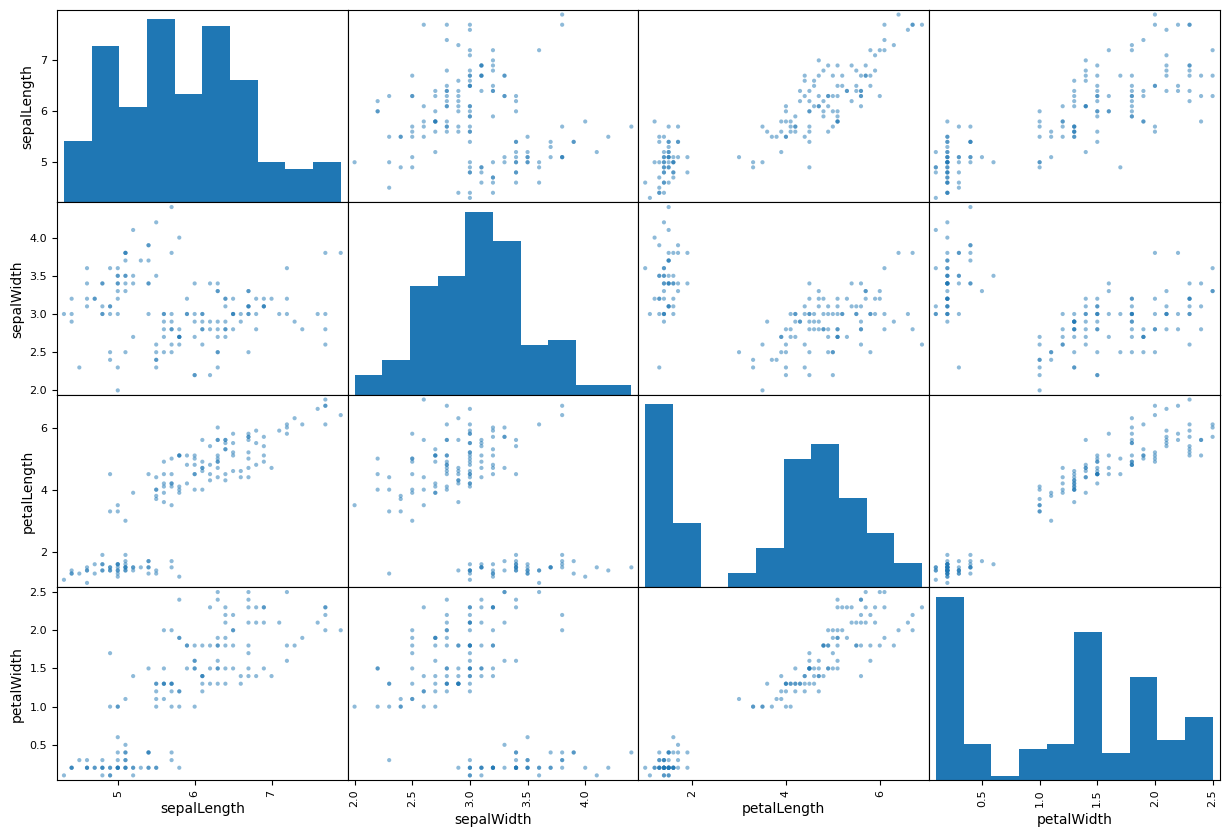

In [35]:
scatter_matrix(dataframe_iris[['sepalLength', 'sepalWidth', 'petalLength','petalWidth']],figsize=(15,10))  
# pairwise relationships.
plt.show()

# Each scatter plot in the matrix shows the distribution and correlation between two variables,
# and different colors represent different species.

# 

In [37]:
ID=[]
for i in range(0,150):
    ID.append(i)

In [38]:
dataframe=pd.DataFrame(ID,columns=['ID'])

In [39]:
dataframe_iris_new = pd.concat([dataframe_iris,dataframe_iris1,dataframe],axis=1)

In [40]:
dataframe_iris_new.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'target',
       'ID'],
      dtype='object')

# 

interaction_plot a function in the statsmodels library, which is focused on statistical modeling and hypothesis testing.


designed to create interaction plots for factorial designs, where the effect of two categorical factors on a continuous response variable is visualized.

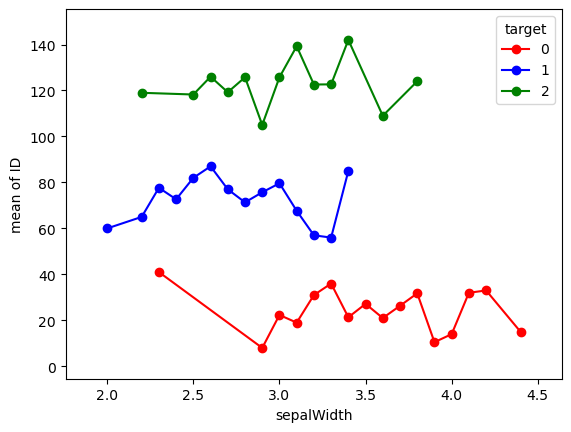

In [41]:
fig = interaction_plot(dataframe_iris_new.sepalWidth,
                       dataframe_iris_new.target,
                       dataframe_iris_new.ID,
                       colors=['red','blue','green'], ms=12)

 sepalWidth is your predictor variable,
 
 target is your grouping variable, and
 
 ID is your response variable, the correct order would be:

# 

In [44]:
# how the relationship between sepalWidth and ID varies across different levels of the target variable.
# Let's break down the components:

# Predictor Variable (sepalWidth):

# This is the variable that you believe influences or predicts the response variable. 
# In the context of the plot, it's sepalWidth.

# Grouping Variable (target):

# This is the variable that defines different groups or levels. 
# In the plot, different levels of target are represented by different colors. 
# Each level of target corresponds to a distinct group in the interaction plot.

# Response Variable (ID):

# This is the variable you are interested in understanding or predicting. 
# In the plot, it's ID. 

# The interaction plot visually depicts how the mean or response in terms of ID changes as sepalWidth varies,
# and how this relationship differs between the groups defined by the target variable.

# 

In [45]:
# Take time to process this 

The interaction plot typically consists of lines or markers representing the mean response-
 for each combination of levels of the predictor and grouping variables. 
The lines or markers are color-coded based on the levels of the grouping variable (target). 
The key aspects to observe in the plot include:

The key aspects to observe in the plot include:

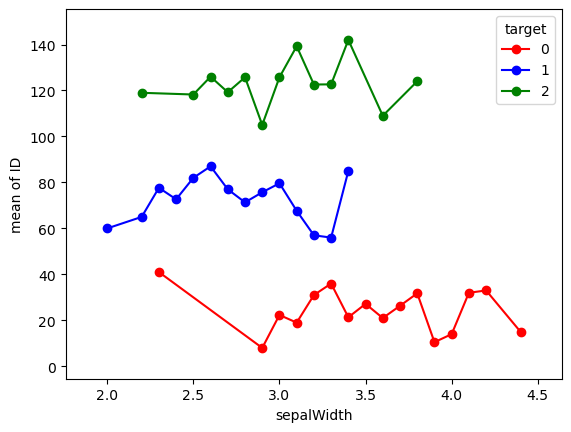

In [46]:
fig = interaction_plot(dataframe_iris_new.sepalWidth,
                       dataframe_iris_new.target,
                       dataframe_iris_new.ID,
                       colors=['red','blue','green'], ms=12)

In [47]:
# Parallelism or Interaction:

# If the lines representing different levels of the grouping variable (target) are parallel, 
# it suggests no significant interaction effect. 
# However, if the lines are not parallel and intersect, 
### it indicates the presence of an interaction effect.

# Direction of Lines:

# The direction of the lines or markers helps understand how the mean response (ID) changes
#  as the predictor variable (sepalWidth) varies.

# Color-Coding:

# Different colors represent different levels of the grouping variable (target). 
# This color-coding helps visually distinguish between groups.

If the lines for different levels of target are parallel, there may be no significant interaction effect.

If the lines are not parallel and intersect, it suggests an interaction effect, indicating that the relationship between sepalWidth and ID varies across different levels of target.

# 

In [48]:
dataframe_iris_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   target       150 non-null    int32  
 5   ID           150 non-null    int64  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [49]:
dataframe_iris_new.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,target,ID
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,74.500000
std,0.828066,0.435866,1.765298,0.762238,0.819232,43.445368
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,37.250000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,74.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,111.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000,149.000000


# 

# Anova test: 
    
    Analysis of variance(anova) is a statistical technique that is used to check if means of two or more groups are 
      statistically different from each other.
        
        Consider a group of three samples means for sepal_width_cm from the iris dataset. 
        
        Our goal is to determine that each group's mean value are statistically different from the other's and to do this we need to evaluate the variability between each of the mean values

# 

# Anova hypothesis

To implement Anova test we have to create null hypothesis and alternate hypothesis

Null hypothesis=sample means are equal

Alternate hypothesis=sample means are not equal

# 

In [50]:
print(dataframe_iris_new['sepalWidth'].groupby(dataframe_iris_new['target']).mean())

target
0    3.428
1    2.770
2    2.974
Name: sepalWidth, dtype: float64


In [51]:
dataframe_iris_new.mean()

sepalLength     5.843333
sepalWidth      3.057333
petalLength     3.758000
petalWidth      1.199333
target          1.000000
ID             74.500000
dtype: float64

# But 
Anova also analyze variance of differnt groups and evaluate whether we have to reject The null hypothesis and accept alternate hypothesis For that Anova calculate f-value and p-value.
P-value:-p-value is used to evaluate hypothesis results.P-value is a number between 0 and 1. 

If p-value<0.05 we have to reject null hypothesis And p-value>0.05 we have to accept null hypothesis.



# F-value:

f-value is the ratio of variance between groups and variance within groups. 

If f-value is close to 1 then we say that our null hypothesis is true i.e samples have equal mean and F-value is greater than 1 then samples have quite different mean values.

#  Anova assumptions: 

1.Normality:-samples are taken from normal distribution. To check whether data is normally distributed or not Anova use shapiro-wilks test 

2.Each sample is independent of other sample.

3.Variance:- variance should be same. To check whether variance between groups are equal Anova use levene/barlett test.

# Check normal distribution of data

(shapiro-wilk test) Null hypothesis:- data is drawn from normal distribution 

Alternate hypothesis:- data is not drawn from normal distribution

In [52]:
stats.shapiro(dataframe_iris_new['sepalWidth'][dataframe_iris_new['target']])

ShapiroResult(statistic=0.7824642658233643, pvalue=1.1905897817111877e-13)

Interpretation:-As p-value is significant we reject null hypothesis.

# 

    Check equality of variance between groups(levene/bartlett test)

In [55]:
p_value=stats.levene(dataframe_iris_new['sepalWidth'],dataframe_iris_new['target'])

In [56]:
p_value

LeveneResult(statistic=55.1738582824089, pvalue=1.1695737027924642e-12)

Interpretation:- As p-value is significant we reject null hypothesis

# 

# Types of Anova: 
One-way Anova:
one way Anova is used to compare means of two or more samples using f-value and p-value.

Two-way Anova:
In two way Anova, data are classified on the basis of two factors.
Difference between one-way Anova and two-way Anova. One way anova compares three or more than three categorical gropus ,compare their means and to evaluate whether there is difference between them. 

Hypothesis of one way-anova: Null hypothesis(h0):-null hypothesis is that all groups of mean are equal,there is no difference between them. Alternate hypothesis(h1):-alternate hypothesis states that there is difference between mean.

Two-way Anova compares means of three or more groups of data, where two independent variables are considered. The hypothesis of two way Anova is same as one-way Anova.

# 

# Example:-

we took iris dataset for Anova testing.Here, we have only one independent variable i.e. Species(iris-setosa,iris-versicolor,iris-virginica) which are in categorical and we took sepal width as a continous variable.

For exmaple, if someone wants looked at sepal width in iris-setosa,iris-versicolor and iris virginica,there would be three species analyzed and therfore three groups to the analysis.

In iris dataset we have only one independent variable i.e. Species so we are doing one-way Anova testing.

# 

In [58]:
F_value,P_value  =  stats.f_oneway (dataframe_iris_new['sepalWidth'],dataframe_iris_new['target'])

In [59]:
print("F_value=",F_value,",","P_value=",P_value)

F_value= 737.2872570149498 , P_value= 1.418242288711535e-82


In [60]:
if F_value>1.0:
    print("******SAMPLES HAVE DIFFERENT MEAN******")
else:
    print("******SAMPLES HAVE EQUAL MEAN******")

******SAMPLES HAVE DIFFERENT MEAN******


Looking at f-value, we say that samples have different mean therefore we conclude that samples have different mean

# 

In [62]:
if P_value<0.05:
    print("******REJECT NULL HYPOTHESIS******")
else:
    print("******ACCEPT NULL HYPOTHESIS******")

******REJECT NULL HYPOTHESIS******
As p-value obtained from one way Anova analysis states that there is significant difference between samples mean.


As p-value obtained from one way Anova analysis states that there is significant difference between samples mean.

# 

# tukey's hsd test 
There are different post-hoc test to verify results. 1.Lsd test. 2.Tukey's hsd test 3.Scheffe's test Here we are going to perform tukey's hsd test to evaluate our hypothesis. To know pairs of significant different groups.Tukey hsd perform multiple pairwise comparions between groups.

# A post-hoc test,
short for post hoc analysis, is conducted after an analysis of variance (ANOVA) to determine which group or groups differ significantly from each other.

ANOVA tests whether there are any statistically significant differences among the means of three or more independent groups. 

If the ANOVA results indicate that there are significant differences, 

a post-hoc test can help identify which specific groups are different from each other.

In [65]:
# Tukey's Honestly Significant Difference (HSD):
# Tukey's HSD is a widely used post-hoc test.  simultaneous confidence intervals
# It is conservative and is appropriate when you want to control the familywise error rate.
# It provides simultaneous confidence intervals for all pairwise differences.

# Bonferroni Correction:  control the overall familywise error rate. 
# The Bonferroni correction is a conservative method that adjusts the significance level to control the overall familywise error rate. 
# It divides the desired alpha level by the number of comparisons. While conservative, it may increase the chance of Type II errors.

# Dunnett's Test: Type I error rate
# Dunnett's test is used when there is a control group, and you are interested in comparing the other groups to the control.
# It is less conservative than Bonferroni but still controls the overall Type I error rate.

# Scheffe's Method: unequal sample sizes
# Scheffe's method is a conservative post-hoc test that provides confidence intervals for all possible pairwise differences.
# It is suitable for cases where there are unequal sample sizes.

# Games-Howell Test: unequal sample sizes and variances
# The Games-Howell test is a non-parametric alternative for cases where the assumption of equal variances is violated. 
# It is suitable for unequal sample sizes and variances.

# 

In [66]:
tukey = pairwise_tukeyhsd(endog=dataframe_iris_new['sepalWidth'], groups=dataframe_iris_new['target'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.658    0.0 -0.8189 -0.4971   True
     0      2   -0.454    0.0 -0.6149 -0.2931   True
     1      2    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------


Interpretation:-Above tukey results show that all pairwise comparison for different groups rejects null hypothesis and indicates statistical significant difference.

# 

# CONCLUSION:

As p-value obtained from Anova test and different test states that we have to reject null hypothesis. 

And accept alternate hypothesis that atleast two groups means are statistically different from each other.

# 

Link : https://www.kaggle.com/code/bhagyashree12/anova-test-on-iris-dataset 

# 

In [67]:
print("Thank You") 

Thank You
